In [ ]:
%tensorflow_version 1.x


import sys
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import time;
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from numpy import mean, absolute
from sklearn.cluster import KMeans
import random

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


######################################## Data Reading #####################################################################
############################################################################################################


print("------ Now Reading the data ------- Wait..")
import pandas as pd
Chaina_features =pd.read_csv('China1.csv', delimiter=',',skiprows=-100,encoding = 'unicode_escape') # select columns from 1 to 16 and store it
Chaina_features.info()
#z1=Chaina_features.describe() # You can check the store data by describing them using the function

print("------ Reading the data ------- Complete..")

#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
print("------ fetching subset of data ------- wait..")
Chaina_features=Chaina_features.head(3000)
print("------ fetched subset of data ------- Complete..")

#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
print("------ Imputation--Linear Interpolation method start------- wait..")
###https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/     ##description use to fil NA or NAN
##limit : Maximum number of consecutive NaNs to fill. Must be greater than 0.
Chaina_features = Chaina_features.interpolate(method='linear')
Chaina_features=Chaina_features.replace(np.NaN, 0)
print("------ Imputation--Linear Interpolation method ------- Complete..")
print("------ Imputation--Linear Interpolation method ------- Complete..")
#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
features= Chaina_features.drop('CONS_NO', axis = 1)
feature_list = list(features.columns)
print("------ Outlier detection and removal 3 sigma method start------- wait..")
from numpy import std
feature=np.array(features)
data_mean, data_std = mean(feature), std(feature)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in feature if (x < lower).any() or ( x > upper).any() ]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in feature if (x >= lower).all() and (x <= upper).all()]
print('Non-outlier observations: %d' % len(outliers_removed))

newchaina=pd.DataFrame(outliers_removed, columns=feature_list)
print("------ 3 sigma method ------- Complete..")

#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
############################################################################################################
print("------ Proposed new sampling method start ------- wait..")
import new_sampling_technique

delsampl=new_sampling_technique.delsamples(newchaina)
print(delsampl.shape)

print("now undersampled data passed to oversample")

sampl=new_sampling_technique.getsamples(newchaina)
print(sampl.shape)
print("------ Proposed new sampling method  ------- completed..")

newt=newchaina.loc[newchaina['FLAG'] == 1]
newt=len(newt.axes[0])
print("No of thefts",newt)
newh=newchaina.loc[newchaina['FLAG'] == 0]
newh=len(newh.axes[0])
print("No of honests",newh)
print("------Proposed HOUBC method ------- complete..")

#############################################################################################################
############################################################################################################
############################################################################################################


labels = np.array(newchaina['FLAG'])#Target  featue
features= newchaina.drop('FLAG', axis = 1)
feature_list = list(features.columns)#it sitore  the  all features expect  the  Reg_capacity price

features_org=features;

print('Data normalization---------------start')
normalized_X=preprocessing.normalize(features)
print('Data normalization---------------Complete')
features = pd.DataFrame(normalized_X, columns=feature_list) # Convert to numpy array
Copy_Features_Ext=features;
print('------ Pre-processing ...Done..')
#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################

print('------ Done..')
print('------ Splitting the Data ------- Wait..')
Feature_train, Feature_test, Label_train, Label_test = train_test_split(features, labels, test_size=0.25, random_state=7)
print('Training Features Shape:', Feature_train.shape)
print('Training Labels Shape:', Label_train.shape)
print('Testing Features Shape:', Feature_test.shape)
print('Testing Labels Shape:', Label_test.shape)
print('------ Done..')
print('################################')



#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################




X = np.zeros((len(features), 32, 32, 3), dtype=np.float32)
y = np.zeros((len(labels), 32, 32, 3), dtype=np.float32)
print(X.shape, y.shape)

from tqdm import tqdm_notebook
from skimage.transform import resize
from skimage.morphology import label

for n, id_ in tqdm_notebook(enumerate(features), total=len(features)):
    # Load images
    img = features
    x_img = img_to_array(img)
    x_img = resize(x_img, (32, 32, 3), mode = 'constant', preserve_range = True)
    # Load masks
    #mask = img_to_array(labels)
    mask = resize(labels, (32, 32, 3), mode = 'constant', preserve_range = True)
    # Save images after scaling in 128 + 128= 256
    ## if before scaled then no need this
    X[n] = x_img
    y[n] = mask
    print("adding-"+str(n))

print(X)
print(y)

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

#train=pd.DataFrame(X_train)
#print(train)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_valid.shape)
print('Testing Labels Shape:', y_valid.shape)
print('------ Done..')

------ Now Reading the data ------- Wait..
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12633 entries, 0 to 12632
Columns: 1036 entries, 1/1/2014 to FLAG
dtypes: float64(1035), object(1)
memory usage: 99.9+ MB
------ Reading the data ------- Complete..
------ fetching subset of data ------- wait..
------ fetched subset of data ------- Complete..
------ Imputation--Linear Interpolation method start------- wait..
------ Imputation--Linear Interpolation method ------- Complete..
------ Imputation--Linear Interpolation method ------- Complete..
------ Outlier detection and removal 3 sigma method start------- wait..
Identified outliers: 23
Non-outlier observations: 2977
------ 3 sigma method ------- Complete..
------ Proposed new sampling method start ------- wait..
(2977, 1035)
honestysamples are: 2463
their shapes are: (2463, 1034)
honest percentile values of 25 and 75: 0.0 5.36
Total values of honest: 2546742
percentage of data in honest p1: 0.0
percentage of data in honest p2: 31.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:173: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


adding-0
adding-1
adding-2
adding-3
adding-4
adding-5
adding-6
adding-7
adding-8
adding-9
adding-10
adding-11
adding-12
adding-13
adding-14
adding-15
adding-16
adding-17
adding-18
adding-19
adding-20
adding-21
adding-22
adding-23
adding-24
adding-25
adding-26
adding-27
adding-28
adding-29
adding-30
adding-31
adding-32
adding-33
adding-34
adding-35
adding-36
adding-37
adding-38
adding-39
adding-40
adding-41
adding-42
adding-43
adding-44
adding-45
adding-46
adding-47
adding-48
adding-49
adding-50
adding-51
adding-52
adding-53
adding-54
adding-55
adding-56
adding-57
adding-58
adding-59
adding-60
adding-61
adding-62
adding-63
adding-64
adding-65
adding-66
adding-67
adding-68
adding-69
adding-70
adding-71
adding-72
adding-73
adding-74
adding-75
adding-76
adding-77
adding-78
adding-79
adding-80
adding-81
adding-82
adding-83
adding-84
adding-85
adding-86
adding-87
adding-88
adding-89
adding-90
adding-91
adding-92
adding-93
adding-94
adding-95
adding-96
adding-97
adding-98
adding-99
adding-100

In [ ]:
!pip install tflearn

In [ ]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d, global_avg_pool
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.activations import softmax
from fractal_block import fractal_conv2d
from tensorflow.contrib import slim
from tflearn.layers.normalization import batch_normalization

# Data loading and preprocessing
#from tflearn.datasets import cifar10
##(X, Y), (X_test, Y_test) = cifar10.load_data()
X=X_train
Y=Label_train
X_test=X_valid
Y_test=Label_test
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)
'''
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
'''
# Convolutional network building
net = input_data(shape=[None, 32, 32, 3],name='input')

filters = [64,128,256,512]
for f in filters:
  net = fractal_conv2d(net, 4, f, 3,
                       normalizer_fn=batch_normalization)
  net = slim.max_pool2d(net,2, 2)

net = fractal_conv2d(net, 4, 512, 2,
                     normalizer_fn=batch_normalization)


net = conv_2d(net, 2, 1)
net = global_avg_pool(net)
net = softmax(net)

net = regression(net, optimizer='adam',loss='categorical_crossentropy',learning_rate=.001)

# Train using classifier
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=1, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=32, run_id='FractalNet')

y_pred2= model.predict(X_test)
print(y_pred2)
y_pred1=model.predict(X)
print(y_pred1)



Training Step: 115  | total loss: 0.70291 | time: 933.862s
| Adam | epoch: 001 | loss: 0.70291 - acc: 0.5225 -- iter: 3680/3694
Training Step: 116  | total loss: 0.70580 | time: 986.034s
| Adam | epoch: 001 | loss: 0.70580 - acc: 0.5077 | val_loss: 0.69347 - val_acc: 0.4992 -- iter: 3694/3694
--
[[0.5120264 0.4879736]
 [0.5120264 0.4879736]
 [0.5120264 0.4879736]
 ...
 [0.5120264 0.4879736]
 [0.5120264 0.4879736]
 [0.5120264 0.4879736]]
[[0.512345   0.48765492]
 [0.5120264  0.4879736 ]
 [0.5120264  0.4879736 ]
 ...
 [0.512345   0.48765492]
 [0.5120264  0.4879736 ]
 [0.5120264  0.4879736 ]]


In [ ]:
import lightgbm as lgb


print(y_pred2.shape,Feature_test.shape)
joinedtrain=np.concatenate((Feature_train,y_pred1), axis=1)
joinedtest=np.concatenate((Feature_test,y_pred2), axis=1)

classifier = lgb.LGBMClassifier(max_depth = 5,
                         lambda_l1 = 0.1,
                         lambda_l2 = 0.01,
                         learning_rate = 0.01,
                         n_estimators = 200, reg_alpha = 1.1, colsample_bytree = 0.9, subsample = 0.9,
                         n_jobs = 5)
classifier.fit(joinedtrain, Label_train, eval_set=[(joinedtest, Label_test)], eval_metric='accuracy',
               verbose=False, early_stopping_rounds=50);
classifier.fit(joinedtest, Label_test, eval_set=[(joinedtrain, Label_train)], eval_metric='accuracy',
               verbose=False, early_stopping_rounds=50);

predictions = classifier.predict(joinedtest)
a = accuracy_score(Label_test, classifier.predict(joinedtest))
b = accuracy_score(Label_train, classifier.predict(joinedtrain))

print("Accuracy on test data",a,"Accuracy on train data",b)

(1232, 2) (1232, 1034)
Accuracy on test data 0.9553571428571429 Accuracy on train data 0.8949648077964266


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Confusion matrix is:  [[144   1]
 [  5 140]]
F1score is:  0.9790209790209791
Recall score: 0.965517
Precision: 0.992908
ROC AUC: 0.979310
MCC: 0.958986


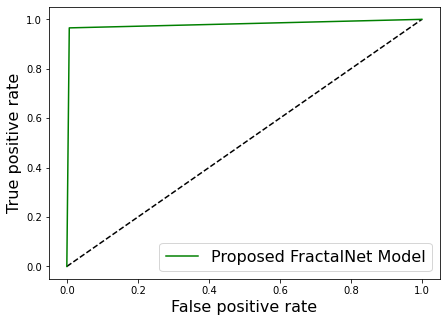

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Average precision-recall score: 0.98


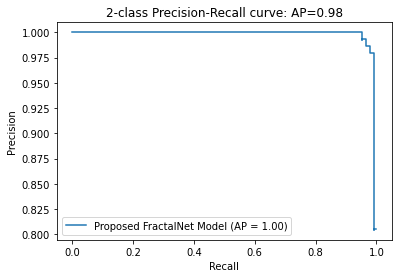

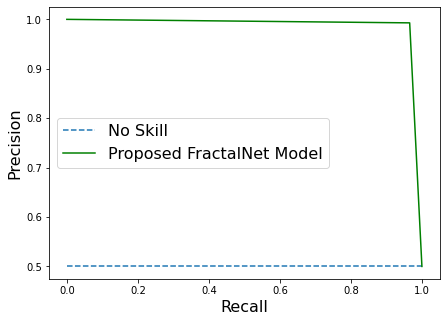

In [ ]:
#############################################################################################################
################################################Validation############################################################
#############################################################################################################
############################################################################################################

print("Confusion matrix is: ", confusion_matrix(Label_test, predictions))

from sklearn.metrics import f1_score
f1score=f1_score(Label_test, predictions, average='binary')
print("F1score is: ", f1score)


from sklearn.metrics import recall_score
recall = recall_score(Label_test, predictions)
print('Recall score: %f' % recall)

from sklearn.metrics import precision_score
precision = precision_score(Label_test, predictions)
print('Precision: %f' % precision)


# ROC AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Label_test, predictions)
print('ROC AUC: %f' % auc)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import matthews_corrcoef
MCC=matthews_corrcoef(Label_test, predictions)
print('MCC: %f' % MCC)



# ROC AUC plot
from sklearn.metrics import roc_curve
fpr1_lr, tpr1_lr, _= roc_curve(Label_test, predictions)
pyplot.figure(figsize=(6,3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1_lr, tpr1_lr, 'g',label='Proposed FractalNet Model')
plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.legend(loc='Best', fontsize=14)
plt.savefig("smote.eps", transparent=True)
# show the plot
plt.show()



from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Label_test, predictions)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(classifier, joinedtest, Label_test, name="Proposed FractalNet Model")
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))



from sklearn.metrics import precision_recall_curve
# plot the precision-recall curves
lr1_precision, lr1_recall, _ = precision_recall_curve(Label_test, predictions)
no_skill = len(Label_test[Label_test==1]) / len(Label_test)
pyplot.figure(figsize=(6,3))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr1_recall, lr1_precision, 'g', label='Proposed FractalNet Model')
# axis labels
pyplot.xlabel('Recall', fontsize=14)
pyplot.ylabel('Precision', fontsize=14)
# show the legend
pyplot.legend(loc='Best', fontsize=14)
pyplot.savefig("smote2.eps", transparent=True)
# show the plot
pyplot.show()

comparison benchmarks

model 1

In [ ]:

X = np.zeros((len(features), 32, 32, 3), dtype=np.float32)
y = np.zeros((len(labels), 32, 32, 3), dtype=np.float32)
print(X.shape, y.shape)

from tqdm import tqdm_notebook
from skimage.transform import resize
from skimage.morphology import label

for n, id_ in tqdm_notebook(enumerate(features), total=len(features)):
    # Load images
    img = features
    x_img = img_to_array(img)
    x_img = resize(x_img, (32, 32, 3), mode = 'constant', preserve_range = True)
    # Load masks
    #mask = img_to_array(labels)
    mask = resize(labels, (32, 32, 3), mode = 'constant', preserve_range = True)
    # Save images after scaling in 128 + 128= 256
    ## if before scaled then no need this
    X[n] = x_img
    y[n] = mask
    print("adding-"+str(n))

print(X)
print(y)

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

#train=pd.DataFrame(X_train)
#print(train)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_valid.shape)
print('Testing Labels Shape:', y_valid.shape)
print('------ Done..')

################################## model 1 Wide n Deep CNN   ###################
#############################################################################################################
############################################################################################################
#############################################################################################################
############################################################################################################
                                        ### CNN
print("W&D-CNN ----------------start")
###################################################################################
from keras.models import Sequential      # Model
from keras.layers import Dense            # lAYER
from keras.layers import Dropout
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras import backend as K


feats_count = Feature_train.shape[1]
samples_count = Feature_test.shape[0]
print(samples_count)
print(feats_count)
Feature_train_CNN = np.expand_dims(Feature_train, axis=2)# new  shape  is  to be added
Feature_test_CNN = np.expand_dims(Feature_test, axis=2)


K.clear_session()
wide = Sequential()

wide.add(Conv1D(32, 3, input_shape=(1034,1)))
wide.add(Activation('relu'))
wide.add(MaxPooling1D(pool_size=(2)))
wide.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
wide.add(Dense(1))
wide.add(Activation('sigmoid'))
wide.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
wide.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10,min_delta=1)
wide.fit(Feature_train_CNN, Label_train, epochs=15, batch_size=32, verbose=1,validation_split=0.25,callbacks=[early_stop])
wide_pred=wide.predict(Feature_train_CNN);
wide_pred1=wide.predict(Feature_test_CNN);


batch_size = 32
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 1

K.clear_session()
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), input_shape=(128,128,1)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

cnn.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors

cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

cnn.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10,min_delta=1)
cnn.fit(X_train, Label_train, epochs=10, batch_size=32, verbose=1,validation_split=0.25,callbacks=[early_stop])
cnn_pred=cnn.predict(X_valid);  # Used to predict

#############################################################################################################
wide_pred1=wide_pred1.round()

from sklearn.metrics import f1_score
f1score=f1_score(Label_test, wide_pred1, average='binary')
print("F1score is: ", f1score)


print("Accuracy:",metrics.accuracy_score(Label_test,wide_pred1))

print("Precision:",metrics.precision_score(Label_test, wide_pred1))

print("Recall:",metrics.recall_score(Label_test, wide_pred1))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Label_test, wide_pred1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



from sklearn.metrics import matthews_corrcoef
MCC=matthews_corrcoef(Label_test, wide_pred1)
print('MCC: %f' % MCC)


# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Label_test, wide_pred1)
print('ROC AUC: %f' % auc)

fpr2_lr, tpr2_lr, _= roc_curve(Label_test, wide_pred1)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2_lr, tpr2_lr, label='W&D-CNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

print("W&D-CNN ----------------end")

from sklearn.metrics import precision_recall_curve
# plot the precision-recall curves
lr2_precision, lr2_recall, _ = precision_recall_curve(Label_test, wide_pred1)
no_skill = len(Label_test[Label_test==1]) / len(Label_test)
pyplot.figure(figsize=(8,6))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr2_recall, lr2_precision, marker='.', label='W&D-CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

(1969, 32, 32, 3) (1969, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


adding-0
adding-1
adding-2
adding-3
adding-4
adding-5
adding-6
adding-7
adding-8
adding-9
adding-10
adding-11
adding-12
adding-13
adding-14
adding-15
adding-16
adding-17
adding-18
adding-19
adding-20
adding-21
adding-22
adding-23
adding-24
adding-25
adding-26
adding-27
adding-28
adding-29
adding-30
adding-31
adding-32
adding-33
adding-34
adding-35
adding-36
adding-37
adding-38
adding-39
adding-40
adding-41
adding-42
adding-43
adding-44
adding-45
adding-46
adding-47
adding-48
adding-49
adding-50
adding-51
adding-52
adding-53
adding-54
adding-55
adding-56
adding-57
adding-58
adding-59
adding-60
adding-61
adding-62
adding-63
adding-64
adding-65
adding-66
adding-67
adding-68
adding-69
adding-70
adding-71
adding-72
adding-73
adding-74
adding-75
adding-76
adding-77
adding-78
adding-79
adding-80
adding-81
adding-82
adding-83
adding-84
adding-85
adding-86
adding-87
adding-88
adding-89
adding-90
adding-91
adding-92
adding-93
adding-94
adding-95
adding-96
adding-97
adding-98
adding-99
adding-100

ValueError: ignored